In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:

import Model as Md
import TrainTestandUtils as Tt
from TrainTestandUtils import TrainTestandUtils as Tt

In [0]:
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM
from Utils import *

In [0]:
a =album_compose()

In [12]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=20,
               input_size=(3,32,32),
               classes=classes)

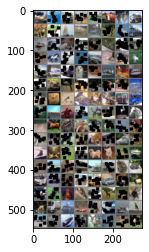

In [15]:
new_model.plot_train_images()

In [16]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [17]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.434272289276123 Batch_id=390 Accuracy=41.31: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 5457/10000 (54.57%)

EPOCH  2


Loss=1.2696716785430908 Batch_id=390 Accuracy=52.70: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0105, Accuracy: 5520/10000 (55.20%)

EPOCH  3


Loss=0.9679104089736938 Batch_id=390 Accuracy=60.54: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 6842/10000 (68.42%)

EPOCH  4


Loss=0.8717948198318481 Batch_id=390 Accuracy=68.48: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7436/10000 (74.36%)

EPOCH  5


Loss=0.8591707348823547 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 7241/10000 (72.41%)

EPOCH  6


Loss=0.7013779878616333 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 7658/10000 (76.58%)

EPOCH  7


Loss=0.8043526411056519 Batch_id=390 Accuracy=77.17: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7403/10000 (74.03%)

EPOCH  8


Loss=0.6036406755447388 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8309/10000 (83.09%)

EPOCH  9


Loss=0.7535165548324585 Batch_id=390 Accuracy=80.19: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8207/10000 (82.07%)

EPOCH  10


Loss=0.5814436078071594 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8193/10000 (81.93%)

EPOCH  11


Loss=0.5360313057899475 Batch_id=390 Accuracy=82.39: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8387/10000 (83.87%)

EPOCH  12


Loss=0.4559633135795593 Batch_id=390 Accuracy=83.42: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8230/10000 (82.30%)

EPOCH  13


Loss=0.7241551876068115 Batch_id=390 Accuracy=84.53: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8451/10000 (84.51%)

EPOCH  14


Loss=0.33173322677612305 Batch_id=390 Accuracy=85.80: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8648/10000 (86.48%)

EPOCH  15


Loss=0.24699346721172333 Batch_id=390 Accuracy=86.94: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8625/10000 (86.25%)

EPOCH  16


Loss=0.2871270775794983 Batch_id=390 Accuracy=89.10: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0029, Accuracy: 8779/10000 (87.79%)

EPOCH  17


Loss=0.12283655256032944 Batch_id=390 Accuracy=90.70: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0025, Accuracy: 8943/10000 (89.43%)

EPOCH  18


Loss=0.19143028557300568 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0022, Accuracy: 9099/10000 (90.99%)

EPOCH  19


Loss=0.154148668050766 Batch_id=390 Accuracy=93.77: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 9139/10000 (91.39%)

EPOCH  20


Loss=0.11934645473957062 Batch_id=390 Accuracy=94.13: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]


Test set: Average loss: 0.0021, Accuracy: 9130/10000 (91.30%)



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [0]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from Utils import change, visualize_cam, imshow, plot_images

trans = transforms.ToPILImage()
pil_img=trans(torchvision.utils.make_grid(images[1]))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


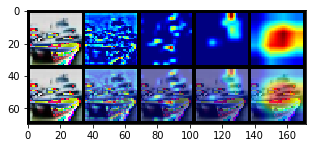

In [20]:


torch_img,normed_torch_img=change(pil_img,device)
plot_images(torch_img,normed_torch_img, model)



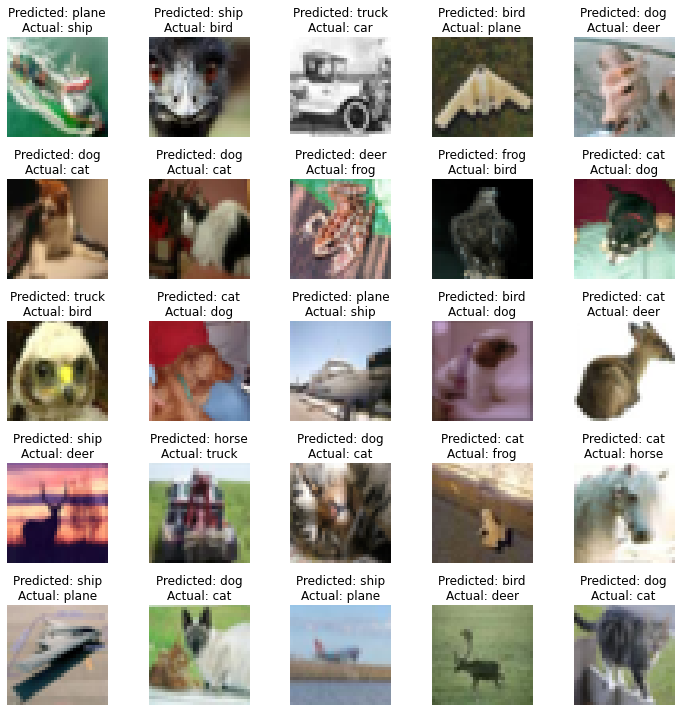

In [21]:
new_model.plot_misclassified('mis.jpg')

In [22]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 91 %


In [23]:
new_model.classwise_acc()


Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 84 %
Accuracy of   cat : 82 %
Accuracy of  deer : 96 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 89 %



Length of train acc is 20
Length of test acc is 20


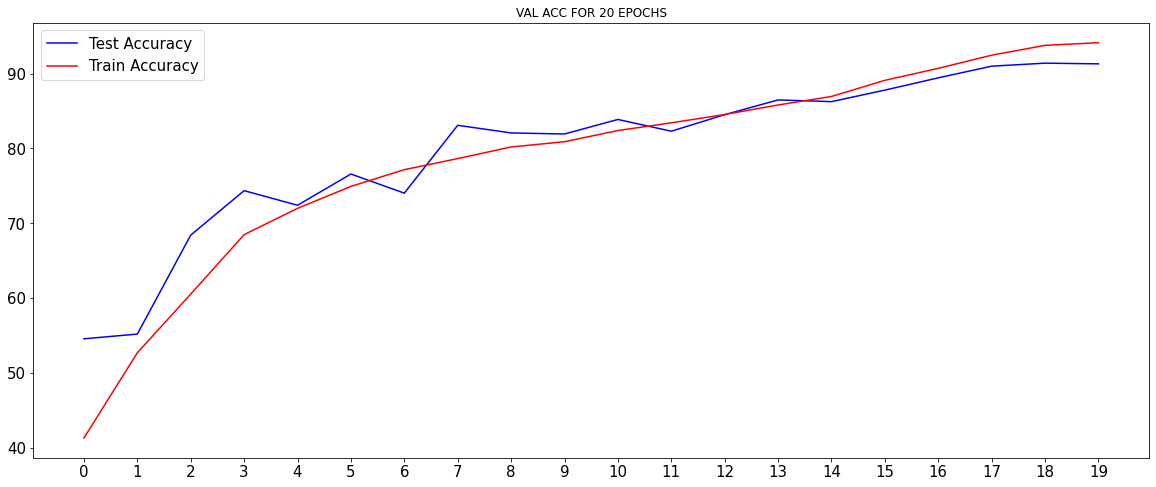

In [24]:
new_model.plot_train_test_acc()